# Why do we use residual vectors in [Similarity Search with IVFPQ](https://peggy1502.medium.com/9c6348fd4db3?source=friends_link&sk=e16ba1a4b8b9a9d61a4a881e2c071d49)?

### Click the link to [find out how the inverted file index (IVF) is implemented alongside product quantization (PQ) for a fast and efficient approximate nearest neighbor search](https://peggy1502.medium.com/9c6348fd4db3?source=friends_link&sk=e16ba1a4b8b9a9d61a4a881e2c071d49)



In [1]:
import random
import numpy as np
import pandas as pd 

from sklearn.cluster import KMeans
from random import randint

random.seed(2022)

x = []
for i in range(50):     
    temp = [randint(0, 4) for _ in range(3)] 
    x.append(temp)      
    
for i in range(50):     
    temp = [randint(5, 9) for _ in range(3)] 
    x.append(temp)     

print(x)
x = np.array(x)

[[4, 2, 3], [4, 2, 4], [0, 4, 3], [2, 0, 3], [2, 3, 4], [4, 4, 0], [2, 0, 2], [2, 3, 0], [3, 2, 3], [1, 0, 0], [1, 3, 3], [0, 0, 0], [4, 3, 3], [2, 0, 4], [2, 3, 2], [0, 3, 1], [0, 0, 3], [2, 4, 3], [2, 0, 0], [4, 1, 0], [3, 3, 3], [4, 1, 2], [4, 3, 1], [0, 1, 1], [0, 3, 1], [3, 0, 1], [4, 4, 0], [3, 1, 2], [1, 2, 4], [2, 2, 2], [4, 0, 3], [3, 3, 3], [3, 1, 4], [3, 3, 1], [1, 1, 3], [3, 2, 0], [1, 2, 4], [2, 1, 2], [0, 2, 1], [1, 1, 3], [2, 1, 0], [1, 2, 0], [2, 3, 0], [4, 3, 0], [4, 1, 3], [1, 1, 1], [2, 2, 3], [2, 3, 0], [1, 4, 1], [3, 2, 1], [8, 8, 5], [5, 5, 8], [7, 9, 6], [6, 5, 6], [7, 9, 7], [7, 7, 8], [8, 7, 7], [6, 7, 9], [9, 5, 9], [9, 5, 5], [8, 5, 9], [7, 5, 6], [8, 6, 6], [8, 5, 5], [5, 8, 5], [5, 8, 5], [6, 6, 7], [8, 5, 7], [8, 6, 5], [6, 7, 7], [6, 7, 7], [6, 8, 5], [6, 7, 5], [7, 8, 9], [9, 8, 8], [9, 5, 5], [9, 5, 8], [7, 7, 9], [8, 9, 7], [5, 7, 6], [8, 9, 6], [7, 6, 7], [7, 7, 7], [5, 7, 7], [5, 9, 6], [7, 6, 9], [7, 7, 5], [5, 6, 8], [8, 6, 5], [9, 8, 7], [9, 9, 9]

In [2]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
clusters = model.fit_predict(x)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [3]:
labels = model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [4]:
centroids = model.cluster_centers_
centroids

array([[2.16, 1.9 , 1.82],
       [7.12, 6.86, 6.76]])

In [5]:
# Query vector
q = [[5,6,6]]
q = np.array(q)

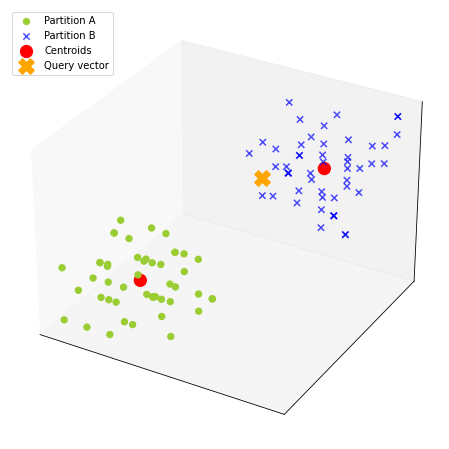

In [6]:
# 3D scatterplot using matplotlib

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[clusters==0, 0], x[clusters==0, 1], x[clusters==0, 2], s=40, color='yellowgreen', label="Partition A", alpha=1)
ax.scatter(x[clusters==1, 0], x[clusters==1, 1], x[clusters==1, 2], s=40, color='blue', label="Partition B", marker="x", alpha=0.7)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], s=150, color="red", label="Centroids", marker="o", alpha=1)
ax.scatter(q[:,0], q[:,1], q[:,2], s=250, color='orange', label="Query vector", marker="X", alpha=1)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.axes.xaxis.set_ticks([]) # hide axis values and marks
ax.axes.yaxis.set_ticks([])
ax.axes.zaxis.set_ticks([])
ax.grid(False)
ax.legend(loc='upper left')

plt.show()

In [7]:
# Residual vectors
xres0 = x[0:50] - centroids[0]
xres1 = x[50:100] - centroids[1]

# Query residual
qres = q - centroids  
qres

array([[ 2.84,  4.1 ,  4.18],
       [-2.12, -0.86, -0.76]])

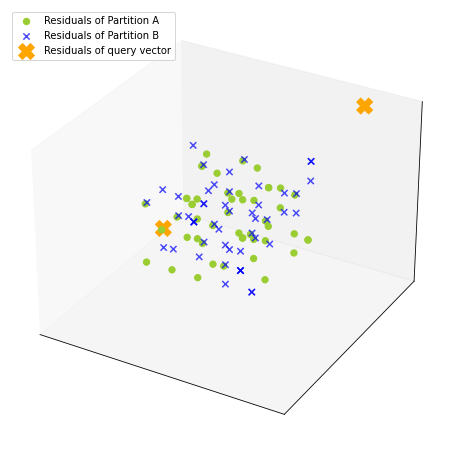

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xres0[:,0],xres0[:,1],xres0[:,2], s=40 , color='yellowgreen', label="Residuals of Partition A", alpha=1)
ax.scatter(xres1[:,0],xres1[:,1],xres1[:,2], s=40 , color='blue', label="Residuals of Partition B",  marker="x", alpha=0.7)
ax.scatter(qres[:,0],qres[:,1],qres[:,2], s=250 , color='orange', label="Residuals of query vector", marker="X", alpha=1)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_xlim(-4.5,4.5)
ax.set_ylim(-4.5,4.5)
ax.set_zlim(-4.5,4.5)
ax.axes.xaxis.set_ticks([]) # hide axis values and marks
ax.axes.yaxis.set_ticks([])
ax.axes.zaxis.set_ticks([])
ax.grid(False)
ax.legend(loc='upper left')

plt.show()